In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams["font.size"] = 6

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import utils.signal as sp

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# load mmode
with open('mmode_1.npy', 'rb') as f:
    dist = np.load(f)[:5600] 
    t_mmode = np.load(f)[:5600] 
    
# load Doppler
with open('doppler_1_250.npy', 'rb') as f:
    t_conv = np.load(f) 
    max_freq = np.load(f) 
    t_freq = np.load(f) 
    frequencies = np.load(f) 
    Sxx_db = np.load(f) 
    
fd_to_v_ratio = 647.0476127563019
max_speed = max_freq/fd_to_v_ratio*100
velocities = frequencies/fd_to_v_ratio*100

dist2 = sp.butter_lp(dist[1:],20,1/t_mmode[1],order=1)
N=100
dist3 = np.convolve(dist[1:], np.ones(N)/N, mode='valid')
dist[-1]

5.556000000000001

(array([ 12,  54,  92, 129, 169, 211]),
 {'peak_heights': array([107.7611    , 107.84561851, 104.21132258, 108.18369254,
         107.93013701, 107.25398894])})

PSV  107.19764326337223
EDV  23.276397599000823
period 0.9949999999999999


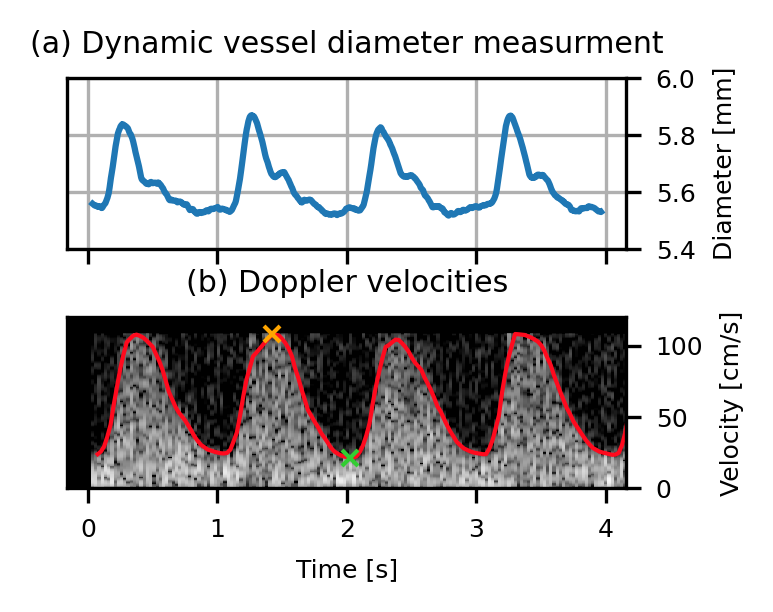

In [3]:
# Create the figure
fig = plt.figure(figsize=(3.16, 1.9), dpi = 300)

# Define the GridSpec
gs = gridspec.GridSpec(2, 1, figure=fig, #width_ratios=[1,0.6],
                       hspace=.4)  #

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

#ax1.plot(t_mmode[1:], dist[1:],linewidth=.5)
#ax1.plot(t_mmode[1:], dist2,linewidth=1.5)
ax1.plot(t_mmode[N//2:-N//2], dist3,linewidth=1.5)
ax1.set_ylim(5.4, 6)
ax1.grid(True)
#ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Diameter [mm]")

ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

ax1.set_title("(a) Dynamic vessel diameter measurment")
ax1.set_xticklabels([])

## Doppler
ax2.imshow(Sxx_db, 
           cmap="gist_gray",
           origin="lower",
           extent=[t_freq.min(), t_freq.max(), velocities.min(), velocities.max()],
           interpolation="none",
           vmin=-40,
           aspect="auto")
ax2.plot(t_conv,max_speed,color = "#ff0a1e",linewidth=1, alpha=1)

ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(0,120)

#ax2.sharex(ax1)
ax2.set_facecolor('k')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Velocity [cm/s]")

ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

ax2.set_title("(b) Doppler velocities")

# Disable x and y tick marks and labels
"""ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.axis("off")"""


from scipy.signal import find_peaks
peaks= find_peaks(+max_speed, height = -50)
display(peaks)
print("PSV ",peaks[1]['peak_heights'].mean())
low = find_peaks(-max_speed, height = -50)
print("EDV ",-low[1]['peak_heights'].mean())

print("period", np.diff(t_conv[[peaks[0][:]]]).mean())

ax2.plot([t_conv[peaks[0][[1]]]],[max_speed[peaks[0][[1]]]],
         'x',
         color = "#FFA500",
         markersize=4,
        alpha=1,
        linewidth=.25)
ax2.plot([t_conv[low[0][[1]]]],[max_speed[low[0][[1]]]],
         'x',
         color = "#32CD32",
         markersize=4,
        alpha=1,
        linewidth=.25)

fig.subplots_adjust(top = 0.9, bottom=0.18, left = 1-0.72, right = 0.87)
#fig.tight_layout()
#fig.savefig('./figures/doppler' + '.pdf', format = 'pdf', dpi = 300)#, bbox_inches='tight', pad_inches=0)
fig.savefig('./figures/doppler' + '.svg', format = 'svg', dpi = 300)

In [4]:
from scipy.signal import find_peaks
peaks= find_peaks(+max_speed, height = -50)
display(peaks)
print("PSV ",peaks[1]['peak_heights'].mean())
peaks = find_peaks(-max_speed, height = -50)
print("EDV ",-peaks[1]['peak_heights'].mean())
max_speed[0]

(array([ 12,  54,  92, 129, 169, 211]),
 {'peak_heights': array([107.7611    , 107.84561851, 104.21132258, 108.18369254,
         107.93013701, 107.25398894])})

PSV  107.19764326337223
EDV  23.276397599000823


23.83421976368276

In [5]:
np.abs(20+peaks[1]['peak_heights'].mean())/20*100

16.381987995004117

In [6]:
velocities.max()

108.18369254437566